# C-M-009: Machine Learning Lab II ’21-22
#### Lab. 3 (Given December 18, 2021; Due December 20, 2021)

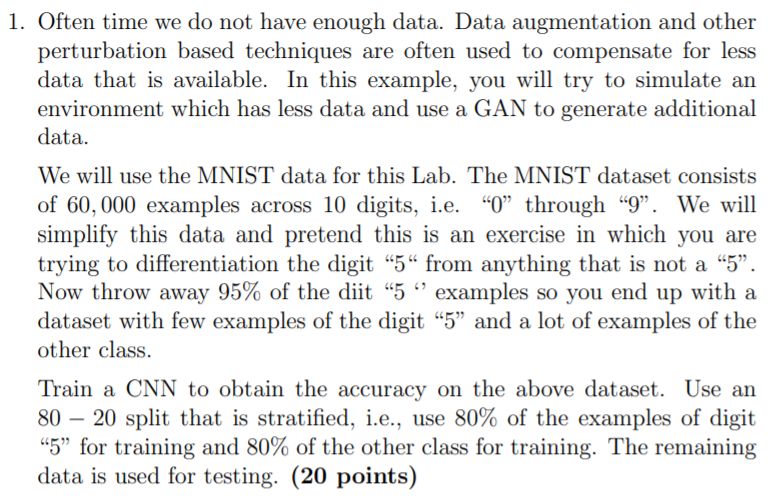

In [ ]:
# Importing required libraries

import keras
from keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout, BatchNormalization, UpSampling2D, Conv2DTranspose
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np


In [ ]:
# Loading the MNIST datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x = np.concatenate((x_train, x_test),axis = 0)
y = np.concatenate((y_train,y_test), axis = 0)

In [ ]:
print(x.shape)
print(y.shape)

(70000, 28, 28)
(70000,)


In [ ]:
# Normalize the dataset
x = x.astype('float32') / 255.



In [ ]:
l = []
for i in range(0,len(y)):
  if y[i]==5:
    l.append(i)
l = l[0:int(len(l)*0.95)]


In [ ]:
print(l)

[0, 11, 35, 47, 65, 100, 132, 138, 145, 173, 175, 182, 191, 219, 236, 239, 244, 259, 266, 273, 278, 284, 287, 306, 316, 328, 332, 335, 376, 396, 403, 407, 417, 420, 437, 463, 474, 480, 496, 502, 504, 512, 513, 514, 516, 523, 537, 543, 544, 554, 579, 610, 614, 620, 622, 625, 635, 652, 653, 679, 690, 699, 719, 722, 748, 751, 757, 768, 771, 775, 778, 799, 805, 815, 832, 836, 837, 845, 879, 886, 899, 912, 915, 916, 921, 924, 947, 956, 960, 964, 970, 985, 1024, 1032, 1039, 1062, 1071, 1087, 1089, 1104, 1109, 1111, 1135, 1162, 1206, 1210, 1222, 1245, 1263, 1265, 1276, 1278, 1283, 1285, 1288, 1298, 1311, 1313, 1324, 1325, 1328, 1340, 1356, 1382, 1402, 1406, 1413, 1420, 1430, 1433, 1442, 1467, 1468, 1481, 1482, 1485, 1490, 1509, 1514, 1516, 1524, 1526, 1556, 1575, 1577, 1587, 1592, 1615, 1635, 1638, 1650, 1670, 1690, 1691, 1702, 1721, 1752, 1785, 1795, 1806, 1810, 1813, 1817, 1824, 1834, 1847, 1864, 1867, 1887, 1913, 1929, 1955, 1961, 1965, 1970, 1978, 1991, 1993, 1996, 1997, 2000, 2028, 2037,

In [ ]:
y = np.delete(y, l)
x = np.delete(x, l, 0)


In [ ]:
for i in range(len(y)):
  if y[i]!=5:
    y[i]=1
  else:
    y[i]=0

In [ ]:
print(x.shape)
print(y.shape)

(64003, 28, 28)
(64003,)


In [ ]:
print(y)

[1 1 1 ... 1 0 1]


In [ ]:
# Making the CNN Model
model = Sequential()
model.add(Conv2D(28, kernel_size = 3, activation = "relu", input_shape = (28,28,1)))
model.add(Conv2D(56,kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(56,kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(56,kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1,activation = 'softmax'))

In [ ]:
# Stating the optimizer, loss function and metric to be used.
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
sss = StratifiedShuffleSplit(n_splits = 5, random_state=1, train_size = 0.8, test_size=0.2)
for (train, test) in sss.split(x, y):
  model.fit(x[train], y[train], epochs =2)


Epoch 1/2
1601/1601 [==============================] - 18s 11ms/step - loss: 0.0056 - accuracy: 0.9951
Epoch 2/2
1601/1601 [==============================] - 16s 10ms/step - loss: 0.0024 - accuracy: 0.9951
Epoch 1/2
1601/1601 [==============================] - 16s 10ms/step - loss: 0.0020 - accuracy: 0.9951
Epoch 2/2
1601/1601 [==============================] - 16s 10ms/step - loss: 0.0012 - accuracy: 0.9951
Epoch 1/2
1601/1601 [==============================] - 16s 10ms/step - loss: 0.0011 - accuracy: 0.9951
Epoch 2/2
1601/1601 [==============================] - 16s 10ms/step - loss: 0.0011 - accuracy: 0.9951
Epoch 1/2
1601/1601 [==============================] - 16s 10ms/step - loss: 7.1722e-04 - accuracy: 0.9951
Epoch 2/2
1601/1601 [==============================] - 16s 10ms/step - loss: 7.3870e-04 - accuracy: 0.9951
Epoch 1/2
1601/1601 [==============================] - 16s 10ms/step - loss: 8.1038e-04 - accuracy: 0.9951
Epoch 2/2
1601/1601 [==============================] - 17s 11

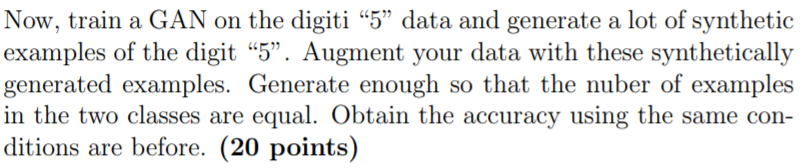

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
l_2 = []
for i in range(0,len(y)):
  if y[i]!=1:
    l_2.append(i)
train_images = x[l_2]
print(train_images.shape)
    

(316, 28, 28)


In [ ]:
n = len(y) - 2*len(l_2)
print(n)

63371


In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images.shape

(316, 28, 28, 1)

In [ ]:
BUFFER_SIZE = 316
BATCH_SIZE = 256

In [217]:
# parameters
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 10000
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
train_dataset =  tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
#  Defining our standalone generator model

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

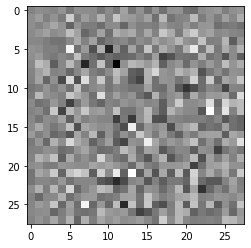

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
# Defining our standalone discriminator model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00338941]], shape=(1, 1), dtype=float32)


In [ ]:
# Cross Entropy Loss function

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Discriminator Loss

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

# Generator Loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
# Optimizers

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
# training loop

# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  return (generate_and_save_images(generator,
                           epochs,
                           seed))

In [213]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  return predictions

In [221]:
pred_new = np.concatenate((pred1,pred2), axis = 0)
pred_new_2 = np.concatenate((pred3,pred4), axis = 0)
pred_new_3 = np.concatenate((pred5,pred6), axis = 0)
pred_new_4 = np.concatenate((pred_new,pred_new_2), axis = 0)
pred_new_5 = np.concatenate((pred_new_3,pred_new_4), axis = 0)

In [222]:
pred_new_5.shape

(60000, 28, 28, 1)

In [223]:
pred = (tf.reshape(pred_new_5,(60000, 28, 28)))

In [224]:
pred.shape

TensorShape([60000, 28, 28])

In [225]:
y_pred = []
for i in range(0, len(pred)):
  y_pred.append(0)
X = np.concatenate ((x, pred),axis = 0)
Y = np.concatenate((y,y_pred), axis = 0)

In [ ]:
sss = StratifiedShuffleSplit(n_splits = 5, random_state=1, train_size = 0.8, test_size=0.2)
for (train, test) in sss.split(X, Y):
  model.fit(X[train],Y[train], epochs =2)


Epoch 1/2
3101/3101 [==============================] - 34s 11ms/step - loss: 0.0025 - accuracy: 0.5136
Epoch 2/2
3101/3101 [==============================] - 33s 11ms/step - loss: 6.4667e-04 - accuracy: 0.5136
Epoch 1/2
3101/3101 [==============================] - 34s 11ms/step - loss: 7.7818e-04 - accuracy: 0.5136
Epoch 2/2
3101/3101 [==============================] - 34s 11ms/step - loss: 7.8116e-04 - accuracy: 0.5136
Epoch 1/2
3101/3101 [==============================] - 34s 11ms/step - loss: 7.3621e-04 - accuracy: 0.5136
Epoch 2/2
3101/3101 [==============================] - 33s 11ms/step - loss: 7.4166e-04 - accuracy: 0.5136


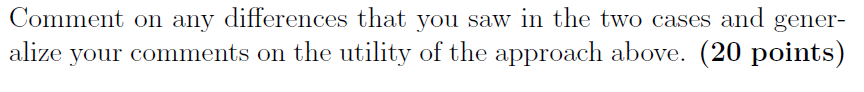

Accuracy in case 1: 0.95

Accuracy in case 2: 0.51

In the first case we have little amount of data for five. There is no way the model can really understand about five. In the second case we are making about 60000 fives from just 316 examples of fives. So the new images of five created are very noisy. This does not help in improving accuracy and the accuracy drastically decreases because of the noise images of five. Both the approaches are equally bad and unscientific.